### Download from MDS

In [1]:
#taken from this StackOverflow answer: https://stackoverflow.com/a/39225039
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [2]:
#Spleen:   https://drive.google.com/file/d/1jzeNU1EKnK81PyTsrx0ujfNl-t0Jo8uE/view?usp=sharing

In [4]:
file_id = '1jzeNU1EKnK81PyTsrx0ujfNl-t0Jo8uE'
destination = '/home/e_radionova/Datasets/Spleen/Spleen.tar'
download_file_from_google_drive(file_id, destination)

In [10]:
! gdown --id "1QKC8uYLrFIMoQOeSNxOHgmvmp0Vrvxmy"

/bin/bash: gdown: command not found


### Preprocessing

In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
from glob import glob
from pathlib import Path

In [2]:
data_path = '/home/e_radionova/Datasets/Spleen/'
task = 'Task09_Spleen'

In [3]:
path_tr = data_path+task+'/imagesTr'
path_tr_label = data_path+task+'/labelsTr'
path_ts = data_path+task+'/imagesTs'
imglist_tr = glob(path_tr+'/*.gz')
imglist_tr_label = glob(path_tr_label+'/*.gz')
imglist_ts = glob(path_ts+'/*.gz')
print('num_train = {}, num_test = {}'.format(len(imglist_tr), len(imglist_ts)))\

num_train = 41, num_test = 20


In [4]:
print('Images')
for img_name in imglist_tr[:5]:
    img = nib.load(img_name)
    print(img.shape)
print('Labels')
for img_name in imglist_tr_label[:5]:
    img = nib.load(img_name)
    print(img.shape)

Images
(512, 512, 90)
(512, 512, 148)
(512, 512, 92)
(512, 512, 51)
(512, 512, 54)
Labels
(512, 512, 90)
(512, 512, 148)
(512, 512, 92)
(512, 512, 51)
(512, 512, 54)


In [6]:
img = nib.load(imglist_tr[2]).get_fdata()
label = nib.load(imglist_tr_label[1]).get_fdata()
print('Image Min-Max values: Image={},{} and label={},{}'.format(img.max(), img.min(), label.max(), label.min()))
print('Number of subclasses = ', int(label.max())+1)

Image Min-Max values: Image=3071.0,-1024.0 and label=1.0,0.0
Number of subclasses =  2


In [7]:
images_dir = '/home/e_radionova/Datasets/Spleen/images'
masks_dir = '/home/e_radionova/Datasets/Spleen/masks'

Path(images_dir).mkdir(exist_ok=True)
Path(masks_dir).mkdir(exist_ok=True)

In [12]:
for i in range(len(imglist_tr)):
    img = nib.load(imglist_tr[i]).get_fdata() /  img.max()
    label = nib.load(imglist_tr_label[i]).get_fdata()
    for sl in range(label.shape[-1]):
        uniq = np.unique(label[:,:,sl])
        if uniq.any(0):
            print(f'{i} -- {uniq}')
            np.save(f'{images_dir}/patient_{i}_{sl}', img[:,:,sl])
            np.save(f'{masks_dir}/patient_{i}_{sl}', label[:,:,sl])

In [11]:
# for i in range(label.shape[-1]):
#     uniq = np.unique(label[:,:,i])
#     print(f'{i} -- {uniq}')
#     print(type(label))
#     plt.imshow(label[:,:,i])
#     plt.show()

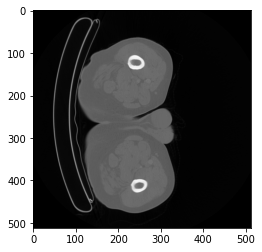

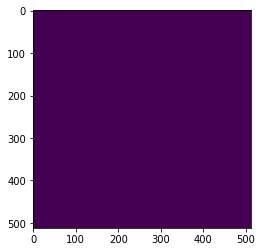

In [10]:
plt.imshow(img[:,:,1], cmap='gray')
plt.show()
plt.imshow(label[:,:,0])